<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第6课 使用Python和pandas统计入门 - 作业 </h1>

某个国家想为9年级学生删去一些预修课程。9年级一共有156577名学生在上这些课程。作为一个数据科学家，你需要去决定哪些课程需要保留，哪些需要删除。为此，你需要统计一些数据，并且以直方图形式展示，最后给出你的答案。


<h2, align=center>获得数据</h2>

现在，我们先通过下面链接得到csv数据文件

In [ ]:
#linux !wget --output-document /resources/data/Grade9.csv https://ibm.box.com/shared/static/nx0f9mgmw2d1ysgyj9d77focjejxs849.csv
#自行下载

### 载入所需的 `pandas` 库

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline 

#### 使用`pd.read_csv` 导入数据

数据中，第一列代表课程名，第二列代表课程的学生人数

In [2]:
#linux StudentInfo = pd.read_csv('/resources/data/Grade9.csv')
StudentInfo = pd.read_csv('resources/data/Grade9.csv')

### 清洗数据

In [3]:
Names=StudentInfo[['Unnamed: 0']].values.flatten()
StudentInfo=StudentInfo.set_index(Names)
del StudentInfo['Unnamed: 0']

In [4]:
StudentInfo

,Students (9th Grade)
ART HISTORY,345
BIOLOGY,3995
CALCULUS AB,727
CALCULUS BC,451
CHEMISTRY,338
CHINESE LANGUAGE & CULTURE,1456
COMPUTER SCIENCE A,1365
MACROECONOMICS,557
MICROECONOMICS,520
ENGLISH LANGUAGE & COMPOSITION,334


 1) 所有课程的学生平均数是多少？

In [5]:
StudentInfo.mean()

Students (9th Grade)    4349.361111
dtype: float64

2) 学生人数的中位数是多少？

In [6]:
StudentInfo.median()

Students (9th Grade)    341.5
dtype: float64

<div align="right">
<a href="#median" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="median" class="collapse">
StudentInfo.median()
</div>

3) 为什么中位数和平均数相差大？

In [7]:
StudentInfo.describe()

,Students (9th Grade)
count,36.000000
mean,4349.361111
std,19188.817443
min,0.000000
25%,98.750000
50%,341.500000
75%,1332.750000
max,115711.000000


答：因为数据中有outliner（离群值点），平均数对此很敏感但中位数不会，最大值达到了11万，远超其他分位数的量级

 <div align="right">
<a href="#q3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q3" class="collapse">
 平均数容易受离群值（边缘值）影响
</div>

4) 现在你还觉得应该保留所有课程么？

不应该保留所有课程，中位数远小于平均数说明大部分课程只有极少数人选了，大多数人选的课程都集中在几门课上

<div align="right">
<a href="#q4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q4" class="collapse">
不，中位数是350，但是平均是4349。这意味着一半课程都只有350不到的人，而少部分课程占了大量的学生。
</div>

5) 标准差是多少？

In [8]:
StudentInfo.std()

Students (9th Grade)    19188.817443
dtype: float64

6) 学生人数的最大值是多少？

In [9]:
StudentInfo.max()

Students (9th Grade)    115711
dtype: int64

7) 通过中位数和最大值解释为什么标准差如此巨大？

最大值相比中位数差距很大，说明有一半数据与最大数差异很大，自然与平均数差异很大，标准差也就很大

<div align="right">
<a href="#q8" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="q8" class="collapse">
最大值远大于中位数
</div>


8) 使用直方图展示数据

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


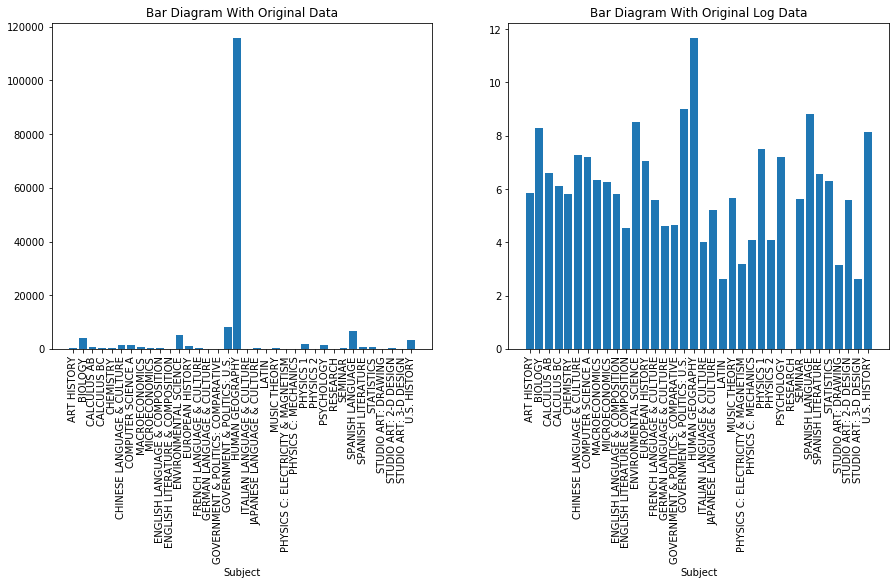

In [10]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(121)
ax.bar(StudentInfo['Students (9th Grade)'].index,StudentInfo['Students (9th Grade)'].values)
plt.xticks(rotation=90)
plt.title('Bar Diagram With Original Data')
plt.xlabel('Subject')
ax=fig.add_subplot(122)
ax.bar(StudentInfo['Students (9th Grade)'].index,np.log(StudentInfo['Students (9th Grade)'].values))
plt.xticks(rotation=90)
plt.title('Bar Diagram With Original Log Data')
plt.xlabel('Subject')
plt.show()

9)学生人数最多的课程名是什么？

In [11]:
StudentInfo.idxmax()

Students (9th Grade)    HUMAN GEOGRAPHY
dtype: object

10) 如果需要只想保留一门课，那是哪门课？ 

In [12]:
StudentInfo.idxmax()

Students (9th Grade)    HUMAN GEOGRAPHY
dtype: object

In [13]:
StudentInfo

,Students (9th Grade)
ART HISTORY,345
BIOLOGY,3995
CALCULUS AB,727
CALCULUS BC,451
CHEMISTRY,338
CHINESE LANGUAGE & CULTURE,1456
COMPUTER SCIENCE A,1365
MACROECONOMICS,557
MICROECONOMICS,520
ENGLISH LANGUAGE & COMPOSITION,334
